Mean square error 0.025341


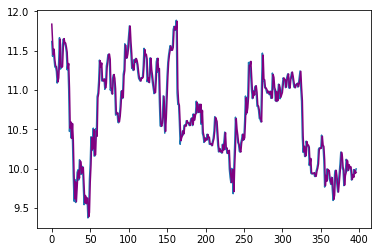

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

parameters = (5, 1, 0)
test_ratio = 0.05

raw = pd.read_csv('f.us_d.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = pd.to_datetime)
data = raw.truncate(before = '1986-01-06', after = '2017-06-30')[['Open']]

split = int(data.size * (1.0 - test_ratio))
learning_set, test_set = data.values[:split], data.values[split:]
forecast = []

#pd.plotting.autocorrelation_plot(data)

for next_date in test_set:
    prediction = ARIMA(learning_set,order = parameters).fit().forecast()[0][0]
    forecast.append(prediction)
    learning_set = np.append(learning_set, next_date)

mse = mean_squared_error(test_set, forecast)

print("Mean square error %f" % mse)
plt.plot(test_set)
plt.plot(forecast, color = 'purple')

plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

test_ratio = 0.02

raw = pd.read_csv('f.us_d.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = pd.to_datetime)
data = raw.truncate(before = '1986-01-06', after = '2017-06-30')[['Open']]

parameters_list = []
for max_p_q in range(1, 10):
    for d in range(0, 3):
        for min_p_q in range(0, 2):
            parameters_list.extend([(max_p_q, d, min_p_q), (min_p_q, d, max_p_q)])
            
for parameters in parameters_list:
    split = int(data.size * (1.0 - test_ratio))
    learning_set, test_set = data.values[:split], data.values[split:]
    forecast = []
    #pd.plotting.autocorrelation_plot(data)
    try:
        for next_date in test_set:
            prediction = ARIMA(learning_set,order = parameters).fit().forecast()[0][0] 
            forecast.append(prediction)
            learning_set = np.append(learning_set,next_date)
        #print('tu')
        mse = mean_squared_error(test_set,forecast)
        print("Mean square error with", parameters, "is", mse)
    except Exception as e:
        print("Using", parameters, "caused \"", e,"\"")

#plt.plot(test_set)
#plt.plot(forecast, color = 'purple')

#plt.show()

Mean square error with (1, 0, 0) is 0.01816674138711197
Mean square error with (0, 0, 1) is 1.7252260953071066
Mean square error with (1, 0, 1) is 0.01851458615351623
Mean square error with (1, 0, 1) is 0.01851458615351623
Mean square error with (1, 1, 0) is 0.01852847124616914
Mean square error with (0, 1, 1) is 0.01852810415120638
Mean square error with (1, 1, 1) is 0.018516753316158555
Mean square error with (1, 1, 1) is 0.018516753316158555
Mean square error with (1, 2, 0) is 0.0274640018865263
Mean square error with (0, 2, 1) is 0.01818360803871119
Mean square error with (1, 2, 1) is 0.018545265590388462
Mean square error with (1, 2, 1) is 0.018545265590388462
Using (2, 0, 0) caused " SVD did not converge "
Mean square error with (0, 0, 2) is 0.5945780830439328
Using (2, 0, 1) caused " SVD did not converge "
Mean square error with (1, 0, 2) is 0.01849881345272077
Mean square error with (2, 1, 0) is 0.018518193316305193
Mean square error with (0, 1, 2) is 0.01851103236595631
Using 

Mean square error with (1, 0, 9) is 0.018762413685101825
Mean square error with (9, 1, 0) is 0.018778977143581625
Mean square error with (0, 1, 9) is 0.01877092070200843
Mean square error with (9, 1, 1) is 0.018778426042277706
Using (1, 1, 9) caused " The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params. "
Mean square error with (9, 2, 0) is 0.02091332131550189
Using (0, 2, 9) caused " The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params. "
Mean square error with (9, 2, 1) is 0.01875775769076493
Using (1, 2, 9) caused " The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params. "
